In [50]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from itertools import combinations

In [51]:
def compute_corr(df1, df2, col='Close'):
    
    date_df1 = df1.iloc[0]['Date']
    date_df2 = df2.iloc[0]['Date']
    date_max = (lambda date1, date2: date1 if date1 > date2 else date2)(date_df1, date_df2)
    print("Nouvelle date de départ : ", date_max)
    
    new_df1 = df1[df1['Date'] >= date_max].copy()
    new_df2 = df2[df2['Date'] >= date_max].copy()
    new_df1.dropna(inplace=True)
    new_df2.dropna(inplace=True)
    # Réinitialisez l'index après avoir supprimé les valeurs NaN
    new_df1.reset_index(drop=True, inplace=True)
    new_df2.reset_index(drop=True, inplace=True)
    
    print("Même taille après modif : ", len(new_df1)==len(new_df2))
    
    df = pd.concat([new_df1[col], new_df2[col]], axis=1)
    
    correlation = df.corr()
    
    return correlation.iloc[0, 1]

In [52]:
def plot_corr_df(list_of_df):
    combinations_list = list(combinations(list_of_df, 2))
    
    covariances = [compute_corr(tup[0][0], tup[1][0]) for tup in combinations_list]
    print(covariances)
    etiquettes = [tup[0][1]+"-"+tup[1][1] for tup in combinations_list]

    # Créer le diagramme
    plt.bar(etiquettes, covariances, color='blue')

    # Ajouter des étiquettes et un titre
    plt.ylabel('Covariance')
    plt.title('Diagramme des covariances')

    # Afficher le diagramme
    plt.show()

Nouvelle date de départ :  2015-10-19
Même taille après modif :  True
Nouvelle date de départ :  1980-12-12
Même taille après modif :  True
Nouvelle date de départ :  1962-01-02
Même taille après modif :  True
Nouvelle date de départ :  2015-10-19
Même taille après modif :  True
Nouvelle date de départ :  2015-10-19
Même taille après modif :  True
Nouvelle date de départ :  1980-12-12
Même taille après modif :  True
[0.6464884316552453, 0.6097637672208309, 0.8924790179913246, 0.45988780325026485, 0.5973591444218187, 0.8648371792119861]


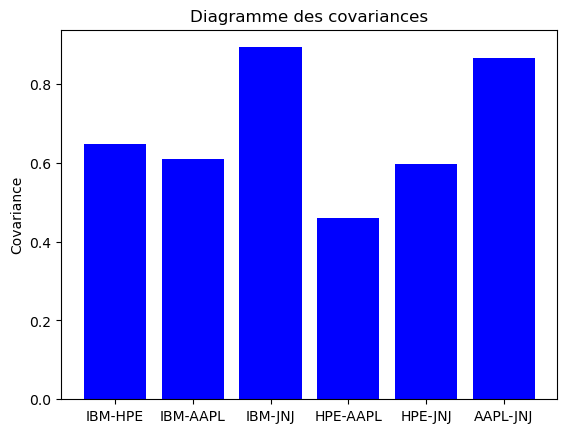

In [54]:
df_ibm = pd.read_csv('./datasets/IBM.csv')
df_aapl = pd.read_csv('./datasets/AAPL.csv')
df_hpe = pd.read_csv('./datasets/HPE.csv')
df_jnj = pd.read_csv('./datasets/JNJ.csv')

plot_corr_df([(df_ibm,"IBM"), (df_hpe,"HPE"), (df_aapl,"AAPL"), (df_jnj,"JNJ")])